# Chapter 4: Color Image Processing

This is the companion file for Chapter 4.

## **Video 4.1: The Physics and Psychology of Color**

[![The Physics and Psychology of Colour - Andrew Hanson](https://img.youtube.com/vi/af78RPi6ayE/0.jpg)](https://www.youtube.com/watch?v=af78RPi6ayE)

*Video: The Physics and Psychology of Colour - Andrew Hanson.*


## **Video 4.2: What is Color?**

[![What is color? - Khan Academy](https://img.youtube.com/vi/0DXZvcfPVrk/0.jpg)](https://www.youtube.com/watch?v=0DXZvcfPVrk)

*Video: “What is color?” from Khan Academy.*



## **Video 4.3: Color Spectrum?**

[![Color Spectrum](https://img.youtube.com/vi/0vJOkO43KI4/0.jpg)](https://www.youtube.com/watch?v=0vJOkO43KI4)

*Video: Color Spectrum.*


## **Video 4.4: How does the brain generate color?**

[![How does the brain generate color?](https://img.youtube.com/vi/l8_fZPHasdo/0.jpg)](https://www.youtube.com/watch?v=l8_fZPHasdo)

*Video: How does the brain generate color?*


## **Programming exercise 4.1:**

1.   Run the following code to see red, green, and blue channel representations of the sample image.
2.   Observe the effect of adding (and subtracting) and image to (from) itself after a slight shift.

(-0.5, 1426.5, 738.5, -0.5)

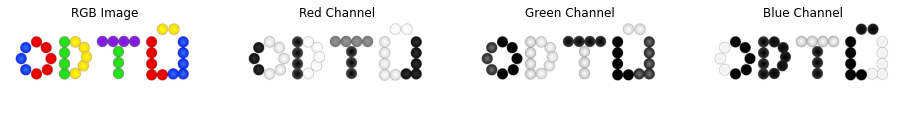

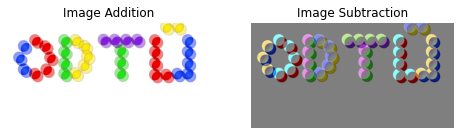

In [1]:
# Import necessary libraries for image processing and visualization
from skimage import io, color
import matplotlib.pyplot as plt
import numpy as np

# Download the image from the specified URL
!wget -cq https://raw.githubusercontent.com/hazalmogultay/466Images/master/W9/odtu.jpg

# Read the downloaded image using skimage's io module
img1 = io.imread("odtu.jpg") 

# Create a blank image of the same shape as img1, filled with white (255)
img2 = 255 * np.ones((img1.shape[0], img1.shape[1], img1.shape[2])).astype('int')

# Place img1 shifted by 20 pixels down and to the right into img2, leaving a border
img2[0:-20, 0:-20, :] = img1[20:, 20:, :]

# Visualize different channels of an image
plt.figure(figsize=(16, 6))

# Display the original RGB image
plt.subplot(141)
plt.imshow(img1)
plt.title('RGB Image')
plt.axis('off')

# Display the Red channel of the image
plt.subplot(142)
plt.imshow(img1[:, :, 0], cmap='gray')
plt.title('Red Channel')
plt.axis('off')

# Display the Green channel of the image
plt.subplot(143)
plt.imshow(img1[:, :, 1], cmap='gray')
plt.title('Green Channel')
plt.axis('off')

# Display the Blue channel of the image
plt.subplot(144)
plt.imshow(img1[:, :, 2], cmap='gray')
plt.title('Blue Channel')
plt.axis('off')

# Create a new figure for image addition and subtraction
plt.figure(figsize=(8, 6))

# Image addition: combine img1 and img2
img3 = img1.astype(float) + img2.astype(float)
# Normalize the result to the range [0, 1]
img3 = (img3 - img3.min()) / (img3.max() - img3.min())

# Display the result of image addition
plt.subplot(1, 2, 1)
plt.imshow((img3 * 255).astype(np.uint8))  # Convert back to uint8 for display
plt.title('Image Addition')
plt.axis('off')

# Image subtraction: subtract img2 from img1
img3 = img1.astype(float) - img2.astype(float)
# Normalize the result to the range [0, 1]
img3 = (img3 - img3.min()) / (img3.max() - img3.min())

# Display the result of image subtraction
plt.subplot(1, 2, 2)
plt.imshow(img3)
plt.title('Image Subtraction')
plt.axis('off')


## **Programming exercise 4.2:**

1.   Run the following code to see hue, saturation, and intensity channels of the sample image.

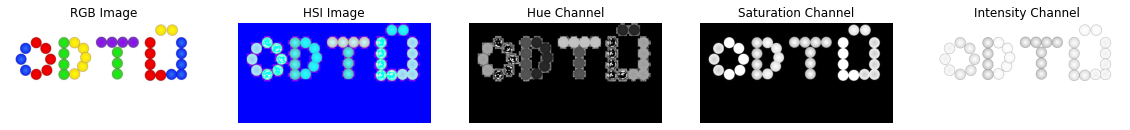

In [2]:
# Convert RGB image to HSI image and visualize hue, saturation, intensity channels
from skimage import io, color
import matplotlib.pyplot as plt
import numpy as np

!wget -cq https://raw.githubusercontent.com/hazalmogultay/466Images/master/W9/odtu.jpg
img1 = io.imread("odtu.jpg") 
img_hsi = color.rgb2hsv(img1)

plt.figure(figsize=(20,8))

plt.subplot(151)
plt.imshow(img1)
plt.title('RGB Image');
plt.axis('off');

plt.subplot(152)
plt.imshow(img_hsi)
plt.title('HSI Image');
plt.axis('off');

plt.subplot(153)
plt.imshow(img_hsi[:,:,0],cmap='gray');
plt.title('Hue Channel');
plt.axis('off');

plt.subplot(154)
plt.imshow(img_hsi[:,:,1],cmap='gray');
plt.title('Saturation Channel');
plt.axis('off');

plt.subplot(155)
plt.imshow(img_hsi[:,:,2],cmap='gray');
plt.title('Intensity Channel');
plt.axis('off');

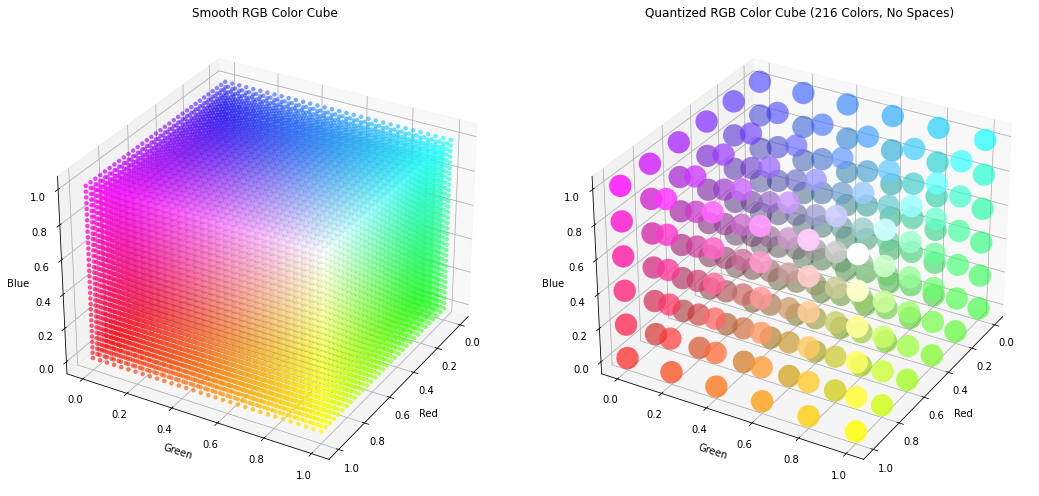

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to generate a smooth RGB color cube
def generate_color_cube(size=32):
    r, g, b = np.meshgrid(
        np.linspace(0, 1, size), 
        np.linspace(0, 1, size), 
        np.linspace(0, 1, size), 
        indexing="ij"
    )
    return r, g, b

# Function to generate a quantized RGB color cube (216 colors)
def generate_quantized_color_cube():
    values = np.linspace(0, 1, 6)  # 6 levels for each channel (0, 51, 102, ..., 255 normalized to 0-1)
    r, g, b = np.meshgrid(values, values, values, indexing="ij")
    return r, g, b

# Generate smooth RGB color cube
size = 32
r_smooth, g_smooth, b_smooth = generate_color_cube(size)

# Generate quantized RGB color cube
r_quantized, g_quantized, b_quantized = generate_quantized_color_cube()

# Flatten the smooth color cube for visualization
colors_smooth = np.stack((r_smooth.flatten(), g_smooth.flatten(), b_smooth.flatten()), axis=-1)
x_smooth, y_smooth, z_smooth = r_smooth.flatten(), g_smooth.flatten(), b_smooth.flatten()

# Flatten the quantized color cube for visualization
colors_quantized = np.stack((r_quantized.flatten(), g_quantized.flatten(), b_quantized.flatten()), axis=-1)
x_quantized, y_quantized, z_quantized = r_quantized.flatten(), g_quantized.flatten(), b_quantized.flatten()

# Plot the smooth RGB color cube
fig = plt.figure(figsize=(15, 7))
ax1 = fig.add_subplot(121, projection='3d')

# Smooth cube scatter
ax1.scatter(x_smooth, y_smooth, z_smooth, c=colors_smooth, marker='o', s=20, edgecolor='none')
ax1.set_xlabel('Red')
ax1.set_ylabel('Green')
ax1.set_zlabel('Blue')
ax1.set_title('Smooth RGB Color Cube')
ax1.view_init(elev=30, azim=30)  # Tilted view

# Plot the quantized RGB color cube
ax2 = fig.add_subplot(122, projection='3d')

# Increase scatter size to remove spaces
ax2.scatter(x_quantized, y_quantized, z_quantized, c=colors_quantized, marker='o', s=500, edgecolor='none')  # Increased size
ax2.set_xlabel('Red')
ax2.set_ylabel('Green')
ax2.set_zlabel('Blue')
ax2.set_title('Quantized RGB Color Cube (216 Colors, No Spaces)')
ax2.view_init(elev=30, azim=30)  # Tilted view

plt.tight_layout()
plt.show()


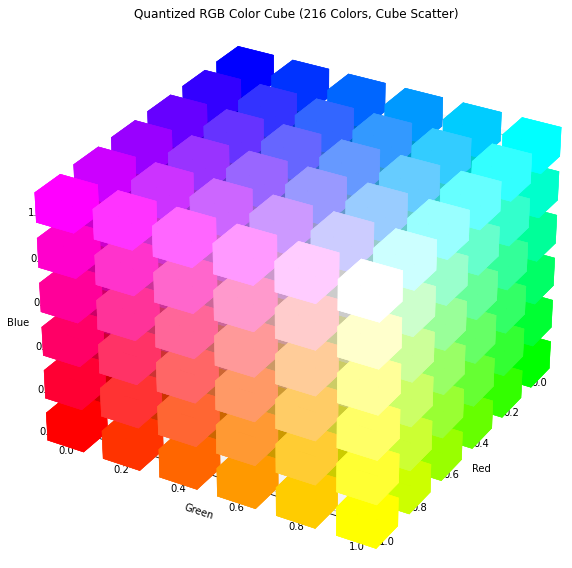

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Function to generate quantized RGB color cube (216 colors)
def generate_quantized_color_cube():
    values = np.linspace(0, 1, 6)  # 6 levels for each channel (0, 51, 102, ..., 255 normalized to 0-1)
    r, g, b = np.meshgrid(values, values, values, indexing="ij")
    return r.flatten(), g.flatten(), b.flatten()

# Generate quantized RGB color cube
x, y, z = generate_quantized_color_cube()
colors = np.stack((x, y, z), axis=-1)

# Function to add cubes to the 3D plot
def add_cubes(ax, x, y, z, size, color):
    half_size = size / 2
    # Define the 8 vertices of a cube
    for xi, yi, zi, ci in zip(x, y, z, color):
        vertices = [
            [xi - half_size, yi - half_size, zi - half_size],
            [xi + half_size, yi - half_size, zi - half_size],
            [xi + half_size, yi + half_size, zi - half_size],
            [xi - half_size, yi + half_size, zi - half_size],
            [xi - half_size, yi - half_size, zi + half_size],
            [xi + half_size, yi - half_size, zi + half_size],
            [xi + half_size, yi + half_size, zi + half_size],
            [xi - half_size, yi + half_size, zi + half_size]
        ]
        
        # Define the 6 faces of the cube using the 8 vertices
        faces = [
            [vertices[0], vertices[1], vertices[2], vertices[3]],  # Bottom
            [vertices[4], vertices[5], vertices[6], vertices[7]],  # Top
            [vertices[0], vertices[1], vertices[5], vertices[4]],  # Front
            [vertices[2], vertices[3], vertices[7], vertices[6]],  # Back
            [vertices[0], vertices[3], vertices[7], vertices[4]],  # Left
            [vertices[1], vertices[2], vertices[6], vertices[5]]   # Right
        ]
        
        # Create the cube and add it to the plot
        cube = Poly3DCollection(faces, color=ci, linewidths=0.5, edgecolors='k')
        ax.add_collection3d(cube)

# Plot the quantized RGB color cube
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Add cube scatter points
add_cubes(ax, x, y, z, size=0.13, color=colors)

# Set labels and plot properties
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
ax.set_title('Quantized RGB Color Cube (216 Colors, Cube Scatter)')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 1)
ax.view_init(elev=30, azim=30)  # Tilted view

plt.tight_layout()
plt.show()


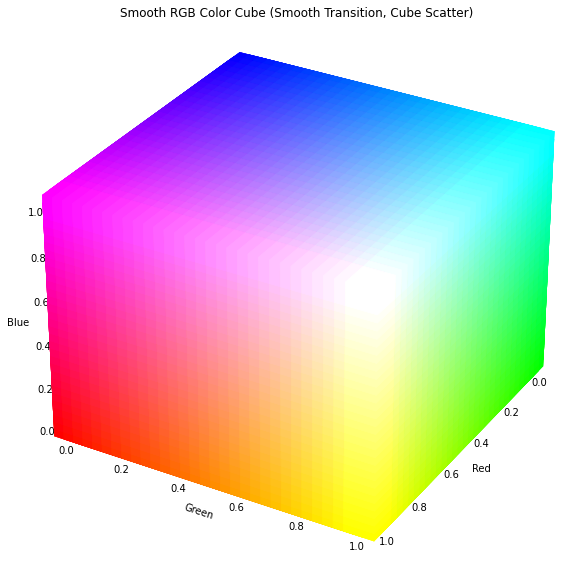

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Function to generate smooth RGB color cube
def generate_smooth_color_cube(resolution=30):
    # Generate a grid of RGB values with smooth transitions
    values = np.linspace(0, 1, resolution)
    r, g, b = np.meshgrid(values, values, values, indexing="ij")
    return r.flatten(), g.flatten(), b.flatten()

# Generate smooth RGB color cube
resolution = 30  # You can adjust the resolution for smoother or coarser transitions
x, y, z = generate_smooth_color_cube(resolution)
colors = np.stack((x, y, z), axis=-1)

# Function to add cubes to the 3D plot
def add_cubes(ax, x, y, z, size, color):
    half_size = size / 2
    # Define the 8 vertices of a cube
    for xi, yi, zi, ci in zip(x, y, z, color):
        vertices = [
            [xi - half_size, yi - half_size, zi - half_size],
            [xi + half_size, yi - half_size, zi - half_size],
            [xi + half_size, yi + half_size, zi - half_size],
            [xi - half_size, yi + half_size, zi - half_size],
            [xi - half_size, yi - half_size, zi + half_size],
            [xi + half_size, yi - half_size, zi + half_size],
            [xi + half_size, yi + half_size, zi + half_size],
            [xi - half_size, yi + half_size, zi + half_size]
        ]
        
        # Define the 6 faces of the cube using the 8 vertices
        faces = [
            [vertices[0], vertices[1], vertices[2], vertices[3]],  # Bottom
            [vertices[4], vertices[5], vertices[6], vertices[7]],  # Top
            [vertices[0], vertices[1], vertices[5], vertices[4]],  # Front
            [vertices[2], vertices[3], vertices[7], vertices[6]],  # Back
            [vertices[0], vertices[3], vertices[7], vertices[4]],  # Left
            [vertices[1], vertices[2], vertices[6], vertices[5]]   # Right
        ]
        
        # Create the cube and add it to the plot
        cube = Poly3DCollection(faces, color=ci, linewidths=0.5, edgecolors='k')
        ax.add_collection3d(cube)

# Plot the smooth RGB color cube
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Add cube scatter points
add_cubes(ax, x, y, z, size=0.1, color=colors)

# Set labels and plot properties
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
ax.set_title('Smooth RGB Color Cube (Smooth Transition, Cube Scatter)')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 1)
ax.view_init(elev=30, azim=30)  # Tilted view

plt.tight_layout()
plt.show()


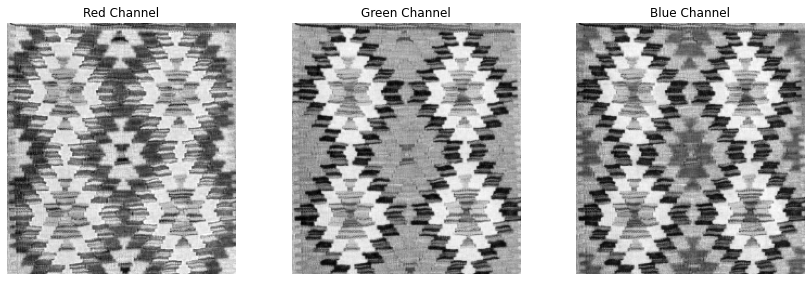

In [8]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os

# Load image (replace 'your_image.jpg' with your image file)
image = Image.open('cropped_kilim_image.png').convert('RGB')

# Split channels
r, g, b = image.split()

# Save channels
r.save('kilim_red_channel.png')
g.save('kilim_green_channel.png')
b.save('kilim_blue_channel.png')

# Display channels
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
axs[0].imshow(np.array(r), cmap='gray')
axs[0].set_title('Red Channel')
axs[0].axis('off')

axs[1].imshow(np.array(g), cmap='gray')
axs[1].set_title('Green Channel')
axs[1].axis('off')

axs[2].imshow(np.array(b), cmap='gray')
axs[2].set_title('Blue Channel')
axs[2].axis('off')

plt.tight_layout()
plt.show()


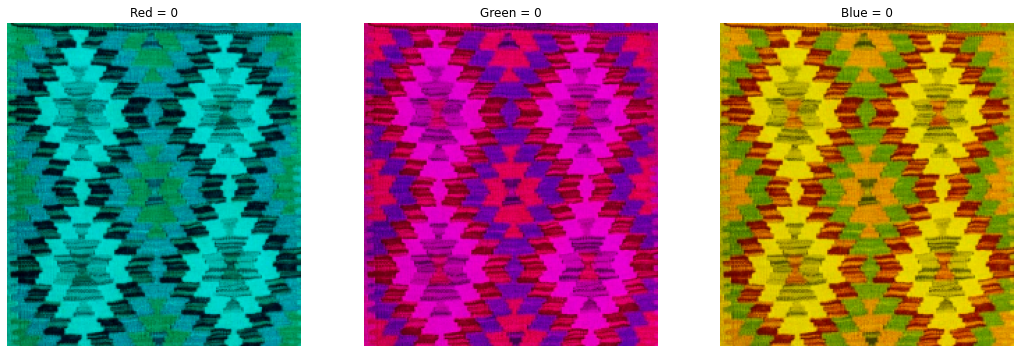

In [9]:
from PIL import Image
import numpy as np

# Load original image
image = Image.open('cropped_kilim_image.png').convert('RGB')
r, g, b = image.split()

# Convert to numpy arrays
r_np = np.array(r)
g_np = np.array(g)
b_np = np.array(b)

# Create versions with one channel zeroed
# Red = 0
red_zero = Image.merge('RGB', (Image.fromarray(np.zeros_like(r_np)), g, b))
red_zero.save('kilim_red_zero.png')

# Green = 0
green_zero = Image.merge('RGB', (r, Image.fromarray(np.zeros_like(g_np)), b))
green_zero.save('kilim_green_zero.png')

# Blue = 0
blue_zero = Image.merge('RGB', (r, g, Image.fromarray(np.zeros_like(b_np))))
blue_zero.save('kilim_blue_zero.png')

# Display the images
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(red_zero)
axs[0].set_title('Red = 0')
axs[0].axis('off')

axs[1].imshow(green_zero)
axs[1].set_title('Green = 0')
axs[1].axis('off')

axs[2].imshow(blue_zero)
axs[2].set_title('Blue = 0')
axs[2].axis('off')

plt.tight_layout()
plt.show()


In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Create a circular hue gradient with a very narrow ring
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw={'projection': 'polar'})

# Number of slices
num_slices = 360
theta = np.linspace(0, 2 * np.pi, num_slices)
radii = np.ones(num_slices) * 0.2  # Narrow ring thickness
hues = theta / (2 * np.pi)
colors = plt.cm.hsv(hues)

# Plot narrow wedges (very thin ring)
ax.bar(theta, radii, width=2 * np.pi / num_slices, bottom=0.95, color=colors, edgecolor='none')

# Remove grid, ticks, and title
ax.set_axis_off()

# Save the figure (no title)
plt.savefig("hue_circle_narrowest.png", bbox_inches='tight', pad_inches=0, dpi=300)
plt.close()


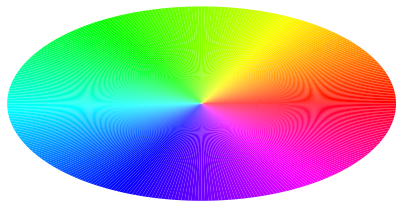

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Wedge
from matplotlib.transforms import Affine2D  # Correct import here

# Ellipse parameters
width = 6  # horizontal axis length
height = 3  # vertical axis length
num_slices = 360

# Create figure and axis
fig, ax = plt.subplots(figsize=(6, 3))
ax.set_aspect('equal')

# Angle values for the hue (in degrees)
angles = np.linspace(0, 360, num_slices, endpoint=False)
hues = angles / 360

# Draw colored wedges shaped into an ellipse
for i, (angle, hue) in enumerate(zip(angles, hues)):
    wedge = Wedge(center=(0, 0),
                  r=1,
                  theta1=angle,
                  theta2=angle + 1,
                  width=1,  # adjust thickness here
                  facecolor=plt.cm.hsv(hue),
                  edgecolor='none')

    # Apply affine transform to scale wedge into ellipse shape
    wedge.set_transform(wedge.get_transform() +
                        Affine2D().scale(width / 2, height / 2) +
                        ax.transData)

    ax.add_patch(wedge)

ax.set_xlim(-width/2, width/2)
ax.set_ylim(-height/2, height/2)
ax.axis('off')
plt.tight_layout()
plt.savefig("hue_ellipse.png", dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()


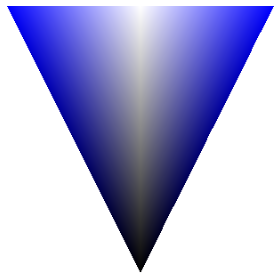

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import hsv_to_rgb

# Image resolution
height = 300  # vertical (intensity)
width = 300   # horizontal (saturation)

# Fixed magenta hue
hue = 4 / 6  # magenta in HSV (normalized [0,1])

# Create blank image (white background)
image = np.ones((height, width, 3))

for y in range(height):
    intensity = 1 - y / (height - 1)  # from 1 (top) to 0 (bottom)

    # Max saturation for this row forms a triangle: max saturation shrinks linearly as y increases
    max_saturation = 1 - y / (height - 1)  # starts at 1 (top), goes to 0 (bottom)

    for x in range(width):
        # Normalize x to [0,1], centered horizontally
        norm_x = abs((x / (width - 1)) - 0.5) * 2  # 0 at center, 1 at edges

        if norm_x <= max_saturation:
            # Saturation grows from center outwards up to max_saturation limit
            saturation = norm_x / max_saturation if max_saturation > 0 else 0
            image[y, x] = hsv_to_rgb([hue, saturation, intensity])
        else:
            # Outside the triangle: white
            image[y, x] = [1, 1, 1]

# Plot and save
plt.figure(figsize=(4, 6))
plt.imshow(image)
plt.axis('off')
plt.tight_layout()
plt.savefig("hsi_hexcone_blue_vertical_cut_triangle.png", dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()


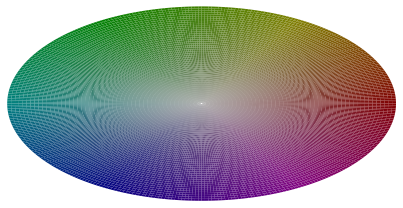

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Wedge
from matplotlib.transforms import Affine2D
from matplotlib.colors import hsv_to_rgb

# Ellipse parameters
width = 6  # horizontal axis length
height = 3  # vertical axis length
num_slices = 360

# Create figure and axis
fig, ax = plt.subplots(figsize=(6, 3))
ax.set_aspect('equal')

# Angle values for the hue (in degrees)
angles = np.linspace(0, 360, num_slices, endpoint=False)
hues = angles / 360

# Fixed intensity
intensity = 0.5

# For each slice, vary saturation from 0 (center) to 1 (edge)
# We'll draw each wedge with a "width" less than 1 to simulate saturation increasing radially.
# To do this, we draw several concentric wedges for each angle with increasing saturation.

num_radial_steps = 50  # number of steps from center (sat=0) to edge (sat=1)

for angle, hue in zip(angles, hues):
    for i in range(num_radial_steps):
        # inner and outer radius for this step (normalized 0 to 1)
        r_inner = i / num_radial_steps
        r_outer = (i + 1) / num_radial_steps
        
        # saturation proportional to outer radius
        saturation = r_outer
        
        rgb_color = hsv_to_rgb([hue, saturation, intensity])
        
        wedge = Wedge(center=(0, 0),
                      r=r_outer,
                      theta1=angle,
                      theta2=angle + 1,
                      width=r_outer - r_inner,
                      facecolor=rgb_color,
                      edgecolor='none')
        
        wedge.set_transform(wedge.get_transform() +
                            Affine2D().scale(width / 2, height / 2) +
                            ax.transData)
        ax.add_patch(wedge)

ax.set_xlim(-width / 2, width / 2)
ax.set_ylim(-height / 2, height / 2)
ax.axis('off')
plt.tight_layout()
plt.savefig("hue_ellipse_saturation_gradient_0.5intensity.png", dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()


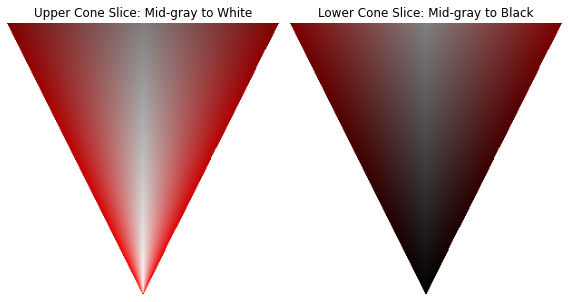

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import hsv_to_rgb

def generate_hsi_triangle_slice(hue, height, width, top_intensity, bottom_intensity):
    """
    Generate an HSI vertical slice shaped as a triangle.
    
    Args:
        hue: Hue value [0,1].
        height: Image height (intensity direction).
        width: Image width (saturation direction).
        top_intensity: Intensity at top center.
        bottom_intensity: Intensity at bottom center.
    Returns:
        RGB image as numpy array.
    """
    image = np.ones((height, width, 3))
    
    for y in range(height):
        # Intensity changes linearly top to bottom
        intensity = top_intensity + (bottom_intensity - top_intensity) * (y / (height - 1))
        
        # Max saturation forms triangle: max saturation shrinks from edges to center as we go down
        max_saturation = 1 - (y / (height - 1))
        
        for x in range(width):
            norm_x = abs((x / (width - 1)) - 0.5) * 2  # 0 at center, 1 at edges
            
            if norm_x <= max_saturation:
                saturation = norm_x / max_saturation if max_saturation > 0 else 0
                image[y, x] = hsv_to_rgb([hue, saturation, intensity])
            else:
                # Outside triangle is white
                image[y, x] = [1, 1, 1]
                
    return image

height = 300
width = 300
hue_red = 0.0  # red

# Upper cone: from mid-gray (intensity=0.5) at top to white (intensity=1.0) at bottom
upper_slice = generate_hsi_triangle_slice(hue_red, height, width, top_intensity=0.5, bottom_intensity=1.0)

# Lower cone: from mid-gray (intensity=0.5) to black (intensity=0)
lower_slice = generate_hsi_triangle_slice(hue_red, height, width, top_intensity=0.5, bottom_intensity=0.0)

# Outside triangle in lower slice also white now (already set by default)

# Plot results
fig, axs = plt.subplots(1, 2, figsize=(8, 6))
axs[0].imshow(upper_slice)
axs[0].set_title("Upper Cone Slice: Mid-gray to White")
axs[0].axis('off')

axs[1].imshow(lower_slice)
axs[1].set_title("Lower Cone Slice: Mid-gray to Black")
axs[1].axis('off')

plt.tight_layout()
plt.savefig("hsi_double_cone_red_slices_white_bg.png", dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()


In [59]:
#Pseudocoloring code

import cv2
import numpy as np

# --- FILE NAMES ---
gray_image_filename = "cropped_kilim_image.png"    # grayscale input
color_image_filename = "redmushroom_long.png"  # color source image

# --- READ IMAGES ---
gray_img = cv2.imread(gray_image_filename, cv2.IMREAD_GRAYSCALE)
color_img_bgr = cv2.imread(color_image_filename)

if gray_img is None or color_img_bgr is None:
    raise FileNotFoundError("Could not load input images.")

# Convert color image from BGR to RGB
color_img = cv2.cvtColor(color_img_bgr, cv2.COLOR_BGR2RGB)

# --- CREATE PALETTE USING LUMINANCE ---
weights = np.array([0.2989, 0.5870, 0.1140])  # luminance weights for RGB

palette = np.zeros((256, 3), dtype=np.float32)
counts = np.zeros(256, dtype=np.int32)

# Calculate luminance per pixel and accumulate colors
luminance_img = (color_img @ weights).astype(np.uint8)  # shape (H,W)

for i in range(color_img.shape[0]):
    for j in range(color_img.shape[1]):
        lum = luminance_img[i, j]
        palette[lum] += color_img[i, j]
        counts[lum] += 1

# Average accumulated colors for each luminance value
for i in range(256):
    if counts[i] > 0:
        palette[i] /= counts[i]

# --- FILL MISSING PALETTE ENTRIES BY LINEAR INTERPOLATION ---
def fill_palette(palette):
    filled = palette.copy()
    known_indices = np.where(np.any(palette != 0, axis=1))[0]

    # Fill start to first known
    filled[:known_indices[0]] = palette[known_indices[0]]

    # Fill between known points
    for k in range(len(known_indices) - 1):
        start, end = known_indices[k], known_indices[k+1]
        for idx in range(start+1, end):
            ratio = (idx - start) / (end - start)
            filled[idx] = (1 - ratio) * palette[start] + ratio * palette[end]

    # Fill last known to end
    filled[known_indices[-1]:] = palette[known_indices[-1]]

    return filled

palette_filled = fill_palette(palette)

# --- SAVE PALETTE VISUALIZATIONS ---
def save_palette_image(palette_array, filename):
    palette_img = np.zeros((50, 256, 3), dtype=np.uint8)
    for x in range(256):
        palette_img[:, x] = np.clip(palette_array[x], 0, 255).astype(np.uint8)
    # Convert RGB to BGR for saving with OpenCV
    cv2.imwrite(filename, cv2.cvtColor(palette_img, cv2.COLOR_RGB2BGR))

save_palette_image(palette, "palette_raw.png")
save_palette_image(palette_filled, "palette_filled.png")

# --- APPLY PALETTE TO GRAYSCALE IMAGE ---
h, w = gray_img.shape
colored_img = np.zeros((h, w, 3), dtype=np.uint8)

for i in range(h):
    for j in range(w):
        val = gray_img[i, j]
        colored_img[i, j] = np.clip(palette_filled[val], 0, 255)

# Save the pseudocolored image (convert RGB->BGR for OpenCV)
cv2.imwrite("pseudocolored.png", cv2.cvtColor(colored_img, cv2.COLOR_RGB2BGR))


True